<a href="https://colab.research.google.com/github/rohitsainii/CodSoft/blob/main/Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install core packages
!pip install mlflow pyngrok scikit-learn fastapi uvicorn python-multipart pydantic docker pandas numpy

# Import libraries
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import os
from pyngrok import ngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 688.0/688.0 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 13.5 MB/s eta 0:00:00


In [2]:
# Install required packages
!pip install pyngrok

# Configure Ngrok with your free token
from pyngrok import ngrok, conf
ngrok_token = "30v7VE7XpBtzeGSTH8LpzMBsfGC_4TP9R3ygANF1asZ7Wfomx"
conf.get_default().auth_token = ngrok_token

# Kill any running ngrok process
!kill $(ps aux | grep 'ngrok' | awk '{print $2}')

# Start MLflow server
get_ipython().system_raw("mlflow server --host 0.0.0.0 --port 5000 &")

# Create public URL tunnel
ngrok_tunnel = ngrok.connect(5000)
public_url = ngrok_tunnel.public_url
print(f"🔥 MLflow UI: {public_url}")

# Set tracking URI
mlflow.set_tracking_uri(public_url)  # Use the Ngrok URL

^C
🔥 MLflow UI: https://08603bf45d93.ngrok-free.app


In [3]:
# Start MLflow server
get_ipython().system_raw("mlflow server --host 0.0.0.0 --port 5000 &")

# Create public URL tunnel
ngrok_tunnel = ngrok.connect(5000)
public_url = ngrok_tunnel.public_url
print(f"🔥 MLflow UI: {public_url}")

# Set tracking URI
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("Credit Card")

2025/08/14 04:26:57 INFO mlflow.tracking.fluent: Experiment with name 'Credit Card' does not exist. Creating a new experiment.


🔥 MLflow UI: https://dac5b8285e8c.ngrok-free.app


<Experiment: artifact_location='mlflow-artifacts:/793619708845851870', creation_time=1755145617224, experiment_id='793619708845851870', last_update_time=1755145617224, lifecycle_stage='active', name='Credit Card', tags={}>

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score

In [5]:
card = pd.read_csv("/content/creditcard.csv")

In [6]:
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
card['Class'].value_counts()


,count
Class,
0,284315
1,492


In [8]:
card.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


<Axes: >

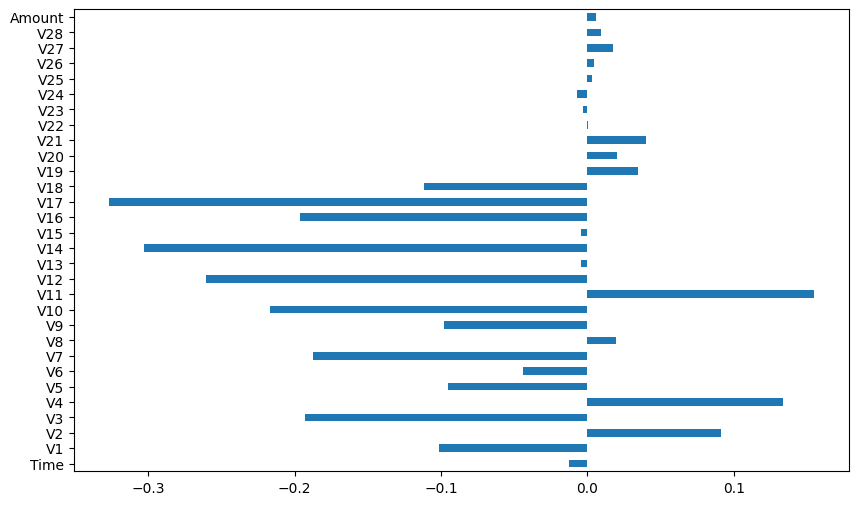

In [9]:
corr_values = card.corr()['Class'].drop('Class')
corr_values.plot(kind='barh', figsize=(10, 6))

In [10]:
card.dropna(inplace=True) # Drop rows with missing values

X = card.drop(['Class','V13','V15','V22','V23','V25','V24','V26','V27','V28'], axis=1)
y = card['Class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
modelL = make_pipeline(StandardScaler(),LogisticRegression(class_weight='balanced', max_iter=1000))
#did this as there is high imbalace in 0 & 1 inside the Target Label

modelD = DecisionTreeClassifier(class_weight='balanced')
modelR = RandomForestClassifier(class_weight='balanced')
modelS = make_pipeline(StandardScaler(),SVC(class_weight='balanced', max_iter=10000))
modelX = XGBClassifier(scale_pos_weight=578) #284315/492≈578

In [35]:
modelL.fit(X_train, y_train)
modelD.fit(X_train, y_train)
modelR.fit(X_train, y_train)
modelS.fit(X_train, y_train)
modelX.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:39:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [42]:
X_train_predL = modelL.predict(X_train)
X_test_predL = modelL.predict(X_test)

f1_trainL = f1_score(y_train, X_train_predL, average='weighted')
f1_testL = f1_score(y_test, X_test_predL, average='weighted')

# Ensure predict_proba returns a 2D array for roc_auc_score
train_probsL = modelL.predict_proba(X_train)
if train_probsL.ndim == 1:
    train_probsL = np.vstack([1 - train_probsL, train_probsL]).T

test_probsL = modelL.predict_proba(X_test)
if test_probsL.ndim == 1:
    test_probsL = np.vstack([1 - test_probsL, test_probsL]).T


roc_auc_trainL = roc_auc_score(y_train, train_probsL, multi_class='ovr')
roc_auc_testL = roc_auc_score(y_test, test_probsL, multi_class='ovr')

print("f1 score on training data:", f1_trainL)
print("f1 score on testing data:", f1_testL)
print()
print("ROC AUC score on training data:", roc_auc_trainL)
print("ROC AUC score on testing data:", roc_auc_testL)

f1 score on training data: 0.9809523809523809
f1 score on testing data: 0.9550108932461873

ROC AUC score on training data: 0.9994588623420437
ROC AUC score on testing data: 0.9984803271441202


In [43]:
# Import additional metrics
from sklearn.metrics import f1_score, roc_auc_score
from mlflow.models.signature import infer_signature


# Load data - Removed iris data loading and splitting
# iris = load_iris()
# X, y = iris.data, iris.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Define parameters
params = {
    "n_estimators": 100,
    "max_depth": 5,
    "random_state": 42
}

mlflow.set_experiment("Credit Card")
with mlflow.start_run():
    # Train model - Using the previously defined X_train and y_train from credit card data
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)

    # Generate predictions and probabilities
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_probs = model.predict_proba(X_train)
    test_probs = model.predict_proba(X_test)

    # Calculate metrics
    f1_train = f1_score(y_train, train_preds, average='weighted')
    f1_test = f1_score(y_test, test_preds, average='weighted')
    roc_train = roc_auc_score(y_train, train_probs, multi_class='ovr')
    roc_test = roc_auc_score(y_test, test_probs, multi_class='ovr')

    # Log parameters and metrics
    mlflow.log_params(params)
    mlflow.log_metrics({
        "f1_train": f1_train,
        "f1_test": f1_test,
        "roc_auc_train": roc_train,
        "roc_auc_test": roc_test
    })

    # Log model
    signature = infer_signature(X_train, train_preds)
    mlflow.sklearn.log_model(model, "iris_model", signature=signature)

    # Print results (optional)
    print(f"Train F1: {f1_train:.4f} | Test F1: {f1_test:.4f}")
    print(f"Train ROC AUC: {roc_train:.4f} | Test ROC AUC: {roc_test:.4f}")
    print(f"Model and metrics logged to MLflow!")

2025/08/14 04:41:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Train F1: 1.0000 | Test F1: 0.9550
Train ROC AUC: 1.0000 | Test ROC AUC: 0.9947
Model and metrics logged to MLflow!
🏃 View run bold-mole-53 at: http://localhost:5000/#/experiments/793619708845851870/runs/3386710cf47d4f1eaea2fd3d8def8ff0
🧪 View experiment at: http://localhost:5000/#/experiments/793619708845851870


In [45]:
X_train_predD = modelD.predict(X_train)
X_test_predD = modelD.predict(X_test)

f1_trainD = f1_score(y_train, X_train_predD, average='weighted')
f1_testD = f1_score(y_test, X_test_predD, average='weighted')

# Ensure predict_proba returns a 2D array for roc_auc_score
train_probsD = modelD.predict_proba(X_train)
if train_probsD.ndim == 1:
    train_probsD = np.vstack([1 - train_probsD, train_probsD]).T

test_probsD = modelD.predict_proba(X_test)
if test_probsD.ndim == 1:
    test_probsD = np.vstack([1 - test_probsD, test_probsD]).T

roc_auc_trainD = roc_auc_score(y_train, train_probsD, multi_class='ovr')
roc_auc_testD = roc_auc_score(y_test, test_probsD, multi_class='ovr')

print("f1 score on training data:", f1_trainD)
print("f1 score on testing data:", f1_testD)
print()
print("ROC AUC score on training data:", roc_auc_trainD)
print("ROC AUC score on testing data:", roc_auc_testD)

f1 score on training data: 1.0
f1 score on testing data: 0.9550108932461873

ROC AUC score on training data: 1.0
ROC AUC score on testing data: 0.9628647214854111


In [48]:
X_train_predR = modelR.predict(X_train)
X_test_predR = modelR.predict(X_test)

f1_trainR = f1_score(y_train, X_train_predR, average='weighted')
f1_testR = f1_score(y_test, X_test_predR, average='weighted')

# Ensure predict_proba returns a 2D array for roc_auc_score
train_probsR = modelR.predict_proba(X_train)
if train_probsR.ndim == 1:
    train_probsR = np.vstack([1 - train_probsR, train_probsR]).T

test_probsR = modelR.predict_proba(X_test)
if test_probsR.ndim == 1:
    test_probsR = np.vstack([1 - test_probsR, test_probsR]).T

roc_auc_trainR = roc_auc_score(y_train, train_probsR, multi_class='ovr')
roc_auc_testR = roc_auc_score(y_test, test_probsR, multi_class='ovr')

print("f1 score on training data:", f1_trainR)
print("f1 score on testing data:", f1_testR)
print()
print("ROC AUC score on training data:", roc_auc_trainR)
print("ROC AUC score on testing data:", roc_auc_testR)

f1 score on training data: 1.0
f1 score on testing data: 0.9550108932461873

ROC AUC score on training data: 1.0
ROC AUC score on testing data: 0.9924016357206012


In [50]:
X_train_predS = modelS.predict(X_train)
X_test_predS = modelS.predict(X_test)

f1_trainS = f1_score(y_train, X_train_predS, average='weighted')
f1_testS = f1_score(y_test, X_test_predS, average='weighted')

# Ensure predict_proba is available and returns a 2D array for roc_auc_score
# Note: SVC needs probability=True to use predict_proba
if hasattr(modelS, 'predict_proba'):
    train_probsS = modelS.predict_proba(X_train)
    if train_probsS.ndim == 1:
        train_probsS = np.vstack([1 - train_probsS, train_probsS]).T

    test_probsS = modelS.predict_proba(X_test)
    if test_probsS.ndim == 1:
        test_probsS = np.vstack([1 - test_probsS, test_probsS]).T

    roc_auc_trainS = roc_auc_score(y_train, train_probsS, multi_class='ovr')
    roc_auc_testS = roc_auc_score(y_test, test_probsS, multi_class='ovr')
else:
    # Handle cases where predict_proba is not available (e.g., if probability=False for SVC)
    # In this case, roc_auc_score cannot be calculated based on probabilities.
    # You might calculate it based on decision_function or skip it.
    # For simplicity, we'll set it to NaN if predict_proba is not available.
    roc_auc_trainS = np.nan
    roc_auc_testS = np.nan
    print("Warning: predict_proba not available for SVC. ROC AUC cannot be calculated based on probabilities.")


print("f1 score on training data:", f1_trainS)
print("f1 score on testing data:", f1_testS)
print()
print("ROC AUC score on training data:", roc_auc_trainS)
print("ROC AUC score on testing data:", roc_auc_testS)

f1 score on training data: 0.9714399160498028
f1 score on testing data: 0.9555338329531878

ROC AUC score on training data: nan
ROC AUC score on testing data: nan


In [52]:
X_train_predX = modelX.predict(X_train)
X_test_predX = modelX.predict(X_test)

f1_trainX = f1_score(y_train, X_train_predX, average='weighted')
f1_testX = f1_score(y_test, X_test_predX, average='weighted')

# Ensure predict_proba returns a 2D array for roc_auc_score
train_probsX = modelX.predict_proba(X_train)
if train_probsX.ndim == 1:
    train_probsX = np.vstack([1 - train_probsX, train_probsX]).T

test_probsX = modelX.predict_proba(X_test)
if test_probsX.ndim == 1:
    test_probsX = np.vstack([1 - test_probsX, test_probsX]).T

roc_auc_trainX = roc_auc_score(y_train, train_probsX, multi_class='ovr')
roc_auc_testX = roc_auc_score(y_test, test_probsX, multi_class='ovr')

print("f1 score on training data:", f1_trainX)
print("f1 score on testing data:", f1_testX)
print()
print("ROC AUC score on training data:", roc_auc_trainX)
print("ROC AUC score on testing data:", roc_auc_testX)

f1 score on training data: 1.0
f1 score on testing data: 0.9550108932461873

ROC AUC score on training data: 1.0
ROC AUC score on testing data: 0.9666224580017683


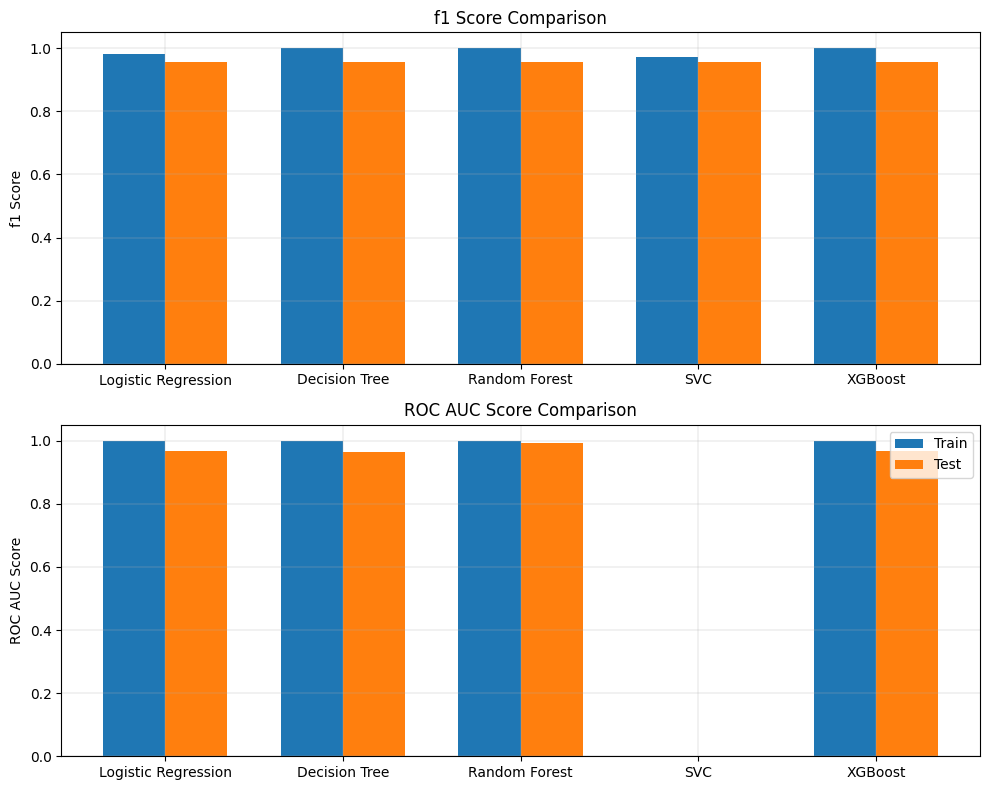

In [53]:
plt.figure(figsize=(10, 8))

names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'XGBoost']

f1_train = [f1_trainL, f1_trainD, f1_trainR, f1_trainS, f1_trainX]
f1_test = [f1_testL, f1_testD, f1_testR, f1_testS, f1_testX]

roc_auc_train = [roc_auc_trainX, roc_auc_trainD, roc_auc_trainR, roc_auc_trainS, roc_auc_trainX]
roc_auc_test = [roc_auc_testX, roc_auc_testD, roc_auc_testR, roc_auc_testS, roc_auc_testX]

lst_train = [f1_train, roc_auc_train]
lst_test = [f1_test, roc_auc_test]
lst_name= ['f1 Score', 'ROC AUC Score']

for i in range(len(lst_name)):
  x = np.arange(len(names))
  width = 0.35
  plt.subplot(2, 1, i + 1)

  train_data = lst_train[i]
  test_data = lst_test[i]

  plt.bar(x-width/2, train_data, width, label='Train')
  plt.bar(x+width/2, test_data, width, label='Test')

  plt.ylabel(lst_name[i])
  plt.title(f'{lst_name[i]} Comparison')
  plt.xticks(x, names)
  plt.grid(True, linewidth=0.25)

plt.tight_layout()
plt.legend()
plt.show()

In [56]:
def user(modelT, selected_features):
    Fraud = []
    for feature in selected_features:
        val = float(input(f"Enter the value of {feature}: "))
        Fraud.append(val)

    Fraud = np.array(Fraud).reshape(1, -1)


    final_prediction = modelT.predict(Fraud)

    if final_prediction[0] == 0:
        print("\nThe transaction is legit...\n")
    else:
        print("\nThe transaction is fraud!!!\n")



# did this below one as we dropped a few features during training, so only input for those who were present
selected_features = [
    'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
    'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20',
    'V21', 'Amount'
]


names = ['logistic regression', 'decision tree', 'random forest', 'svc', 'xgboost']
models = [modelL, modelD, modelR, modelS, modelX]

while True:
    try:
        a = int(input("Enter how many models you want to test: "))
        if 0 < a <= len(names):
            break
        else:
            print(f"Please enter a number between 1 and {len(names)}.")
    except ValueError:
        print("Invalid input. Please enter an integer.")

for i in range(a):
    while True:
        c = input("Input the model name: ").lower()
        if c in names:
            indx = names.index(c)
            print(f"\nSelected model: {names[indx].upper()}\n")
            user(models[indx], selected_features)
            break
        else:
            print("Invalid model name. Please choose from:", ", ".join(names))

Enter how many models you want to test: 1
Input the model name: xgboost

Selected model: XGBOOST

Enter the value of Time: 472
Enter the value of V1: -3.0435406239976


KeyboardInterrupt: Interrupted by user